In [1]:
from STO3G import *

In [32]:
def compararSTO(nombre:str, formato:str, ref:dict, datasets:list, xticks:list, yticks:list):
    """ Gráfica de una función principal f(x) y múltiples funciones gi(x)

    nombre : nombre del archivo .formato (si 'None' no se guarda la gráfica)
    ref : conjunto de referencia de la forma {'x':[...], 'y':[...]}
    datasets : lista de conjuntos por comparar [data1, data2, ...]
        dataN.keys() = 'y', 'labels', 'linestyle', 'linewidth', 'marker', 'markersize', 'color', 'N'
        N : [a,b,...]
            1er conjunto -> se consideran únicamente cada 'a' número de elementos
            2do conjunto -> se consideran únicamente cada 'b' número de elementos
    """
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 fila, 2 columnas, tamaño de figura (15, 5)

    # Comparación función de Slater con Gaussianas
    axs[0].plot(ref['x'], ref['y'], label=ref['label'], color=ref['color'], linewidth=ref['linewidth']) # función principal
    for data in datasets: # funciones aproximadas
        x = ref['x'][::data['N']]
        y = data['y'][::data['N']]
        axs[0].plot(x, y, label=data['label'], linestyle=data['linestyle'], linewidth=data['linewidth'], marker=data['marker'], markersize=data['markersize'], color=data['color'])
    axs[0].set_ylabel(r'$R_{1s}$', fontsize=22, labelpad=10)
    axs[0].set_xticks(xticks[0])
    axs[0].set_xticks(np.arange(0, 4.1, 0.5), minor=True)
    axs[0].set_yticks(yticks[0])
    axs[0].set_yticks(np.arange(0, 3.1, 0.25), minor=True)

    # Comparación de las funciones de distribución radiales de Slater con Gaussianas
    k = 4*np.pi*np.power(ref['x'],2)
    axs[1].plot(ref['x'], k*np.power(ref['y'],2), label='Slater', color='k', linewidth=ref['linewidth']) # función principal
    for data in datasets: # funciones aproximadas
        x = ref['x'][::data['N']]
        k = 4*np.pi*np.power(x,2)
        y = data['y'][::data['N']]
        axs[1].plot(x, k*np.power(y,2), label=data['label'], linestyle=data['linestyle'], linewidth=data['linewidth'], marker=data['marker'], markersize=data['markersize'], color=data['color'])
    axs[1].set_ylabel(r'$4\pi r^2 |R_{1s}|^2$', fontsize=22, labelpad=10)
    axs[1].set_xticks(xticks[1])
    axs[1].set_xticks(np.arange(0, 4.1, 0.5), minor=True)
    axs[1].set_yticks(yticks[1])
    axs[1].set_yticks(np.arange(0, 7.1, 1), minor=True)

    for ax in axs:
        # x config
        ax.set_xlabel('Radio ($a_0$)', fontsize=22, labelpad=10)
        # plot config
        ax.tick_params(axis='both', which='major', labelsize=18)
        ax.legend(fontsize=15, loc='upper right')
        ax.grid(alpha=alpha, which='both')

    fig.subplots_adjust(wspace=0.2)
    if nombre is not None: # guardar
        fig.savefig(f"imgs/{nombre}.{formato}", format=f"{formato}", bbox_inches='tight')
    plt.show()

In [24]:
n, l, m = 1,0,0
z = 1 # exponente orbital de tipo Slater

In [25]:
xdata = np.linspace(0,4,100)
ySlater = R_STO(n, z, xdata)
yStewart = R_STO_nG(n, dSte, aSte, l, xdata)
ySTO3G = R_STO_nG(n, d, a1, l, xdata) # este trabajo

linewidth, fontsize, labelsize, alpha = 4, 15, 11, 0.4

Slater = {'x':xdata, 'y':ySlater, 'label':'Slater', 'color':'k', 'linewidth':linewidth/2}
Stewart = {'y':yStewart, 'label':'Stewart', 'linestyle':'--', 'linewidth':linewidth, 'marker':None, 'markersize':0, 'color':'blue', 'N':1}
STO3G = {'y':ySTO3G, 'label':'Este trabajo', 'linestyle':'None', 'linewidth':None, 'marker':'o', 'markersize':10, 'color':'red', 'N':5} # este trabajo
datasets = [Stewart, STO3G]

xticks = [np.arange(0, 4.1, 1), np.arange(0, 4.1, 1)]
yticks = [np.arange(0, 2.1, 0.5), np.arange(0, 7.1, 2)]

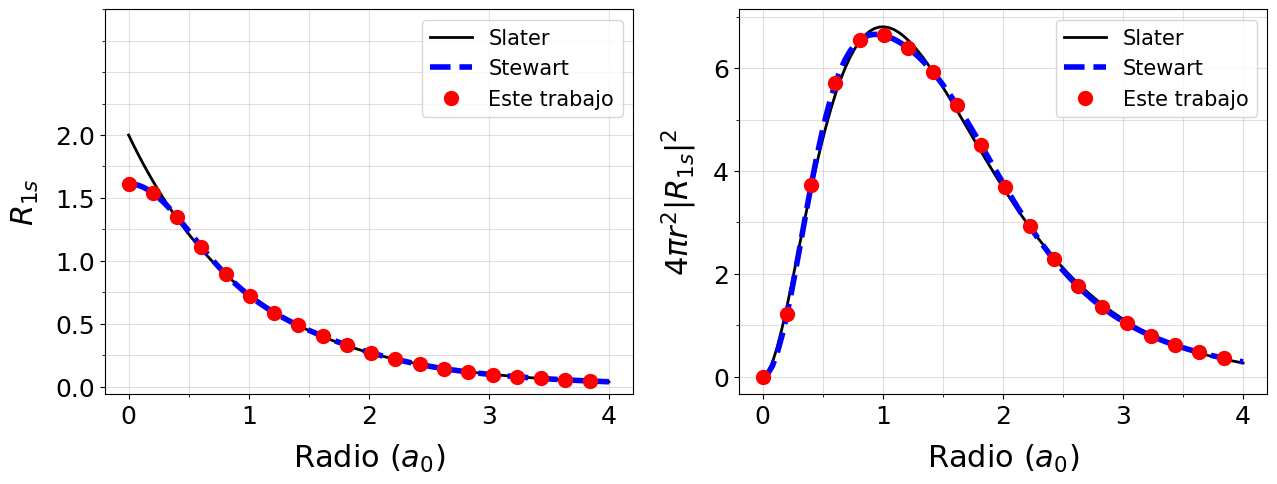

In [26]:
nombre, formato = 'H2_SSS', 'svg'
compararSTO(None, formato, Slater, datasets, xticks, yticks)

In [33]:
z = 1.24 # exponente orbital de tipo Slater

xdata = np.linspace(0,4,100)
ySlater = R_STO(n, z, xdata) # función radial de tipo Slater |1s>
ySzabo = R_STO_nG(n, dSO, aSO, l, xdata)
ySTO3G = R_STO_nG(n, d, a2, l, xdata) # este trabajo

linewidth, fontsize, labelsize, alpha = 4, 15, 11, 0.4

Slater = {'x':xdata, 'y':ySlater, 'label':'Slater', 'color':'k', 'linewidth':linewidth/2}
Szabo = {'y':ySzabo, 'label':'Szabo y Ostlund', 'linestyle':'--', 'linewidth':linewidth, 'marker':None, 'markersize':0, 'color':'purple', 'N':1}
STO3G = {'y':ySTO3G, 'label':'Este trabajo', 'linestyle':'None', 'linewidth':None, 'marker':'o', 'markersize':10, 'color':'darkcyan', 'N':5} # este trabajo
datasets = [Szabo, STO3G]

xticks = [np.arange(0, 4.1, 1), np.arange(0, 4.1, 1)]
# yticks = [np.arange(0, 2.1, 0.5), np.arange(0, 7.1, 2)]
yticks = [np.arange(0,2.7,0.5), np.arange(0,8.5,2)]

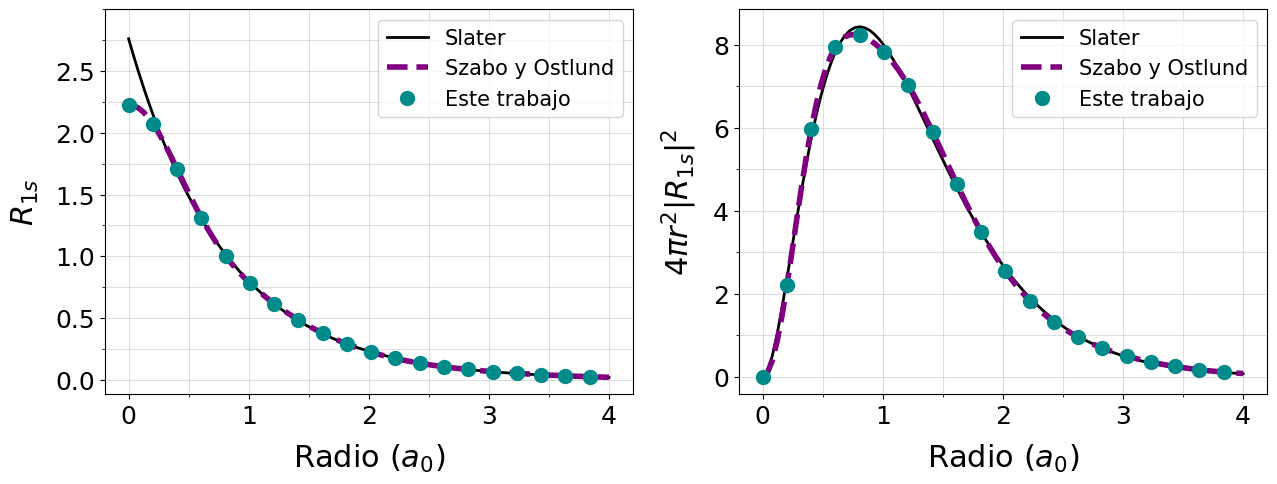

In [34]:
nombre, formato = 'H2_SSSO', 'svg'
compararSTO(nombre, formato, Slater, datasets, xticks, yticks)